# This notebook is Clastering

Student: Шевченко Алексей

Group:   ИУ1-52Б

Вариант: 24

### Подгрузка данных

In [28]:
data = [
[3.5300, 3.5500, 3.1200],
[4.7400, 3.3200, 3.1200],
[1.9100, 2.0700, 1.4800],
[3.4600, 2.4900, 0.3700],
[3.0100, 4.7500, 1.4700],
[3.8800, 4.7700, 1.1700],
[2.9600, 3.6600, 1.7300],
[1.8800, 1.9200, 4.2400],
[4.2500, 0.2000, 0.8000],
[1.1300, 2.9100, 0.7900],
[3.9800, 2.8200, 2.5400],
[4.9800, 1.7800, 3.0200],
[1.4100, 4.4000, 0.8100]
]

### Подключение библиотек

In [2]:
import numpy as np
import pandas as pd

In [3]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Отображение всех точек в начале работы

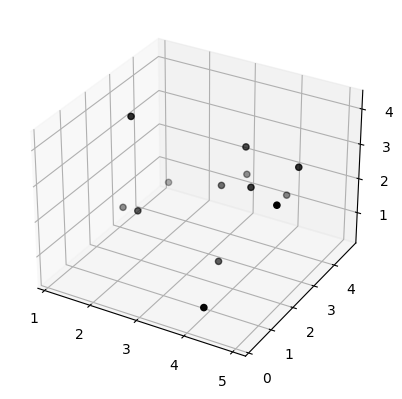

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

data_x = []
data_y = []
data_z = []
for point in data:
    data_x.append(point[0])
    data_y.append(point[1])
    data_z.append(point[2])

# error with slice from matplotlib.pyplot.fig.add_subplot.scater
ax.scatter(data_x, data_y, data_z, c='black', marker='o')
plt.show()

Количество кластеров: 3

Индекс Дэвида-Болдуина: 1.0353276154373376



c:\Users\AlexS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


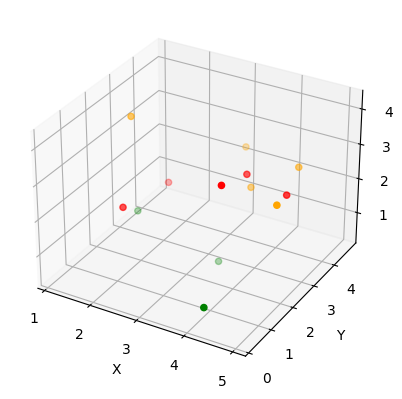

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

'''
    Структура следующего скрипта простая
        1) В переменной num_of_clusters укажите количество кластеров, на которое хотите разбить свои данные X
        2) После предсказания модели переменной labels будет список "Лэйблов" для каждого объекта данных, они представляют из себя 
        набор чисел от 0 до num_of_clusters
        
        Для визуализации:
            1) создаём список X_(name_of_color) = [] (их кол-во зависит от переменной num_of_clusters)
            2) в цикле for в этот список добавляем элементы
            3) отображаем данные точки с помощью функции scatter (в качестве параметра цвета указываем уникальный цвет)
'''

X = np.array(data)

# Задайте количество кластеров (от 2 до -1 от количества данных)
num_of_clusters = 3

kmeans = KMeans(n_clusters=num_of_clusters, random_state=30)
labels = kmeans.fit_predict(X)

db_index = davies_bouldin_score(X, labels)
print(f"Количество кластеров: {num_of_clusters}\n")
print(f"Индекс Дэвида-Болдуина: {db_index}\n")

unique_labels = list(set(labels))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X_red = []
X_orange = []
X_green = []

for i in unique_labels:
    filtered_label = X[labels == i]
    if i == 0:
        X_red = filtered_label
    elif i == 1:
        X_orange = filtered_label
    else:
        X_green = filtered_label

ax.scatter(X_red[:, 0], X_red[:, 1], X_red[:, 2], c='red', marker='o') 
ax.scatter(X_orange[:, 0], X_orange[:, 1], X_orange[:, 2], c='orange', marker='o') 
ax.scatter(X_green[:, 0], X_green[:, 1], X_green[:, 2], c='green', marker='o') 

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Покажем график
plt.show()

### Отображение точек в различных двумерных пространствах

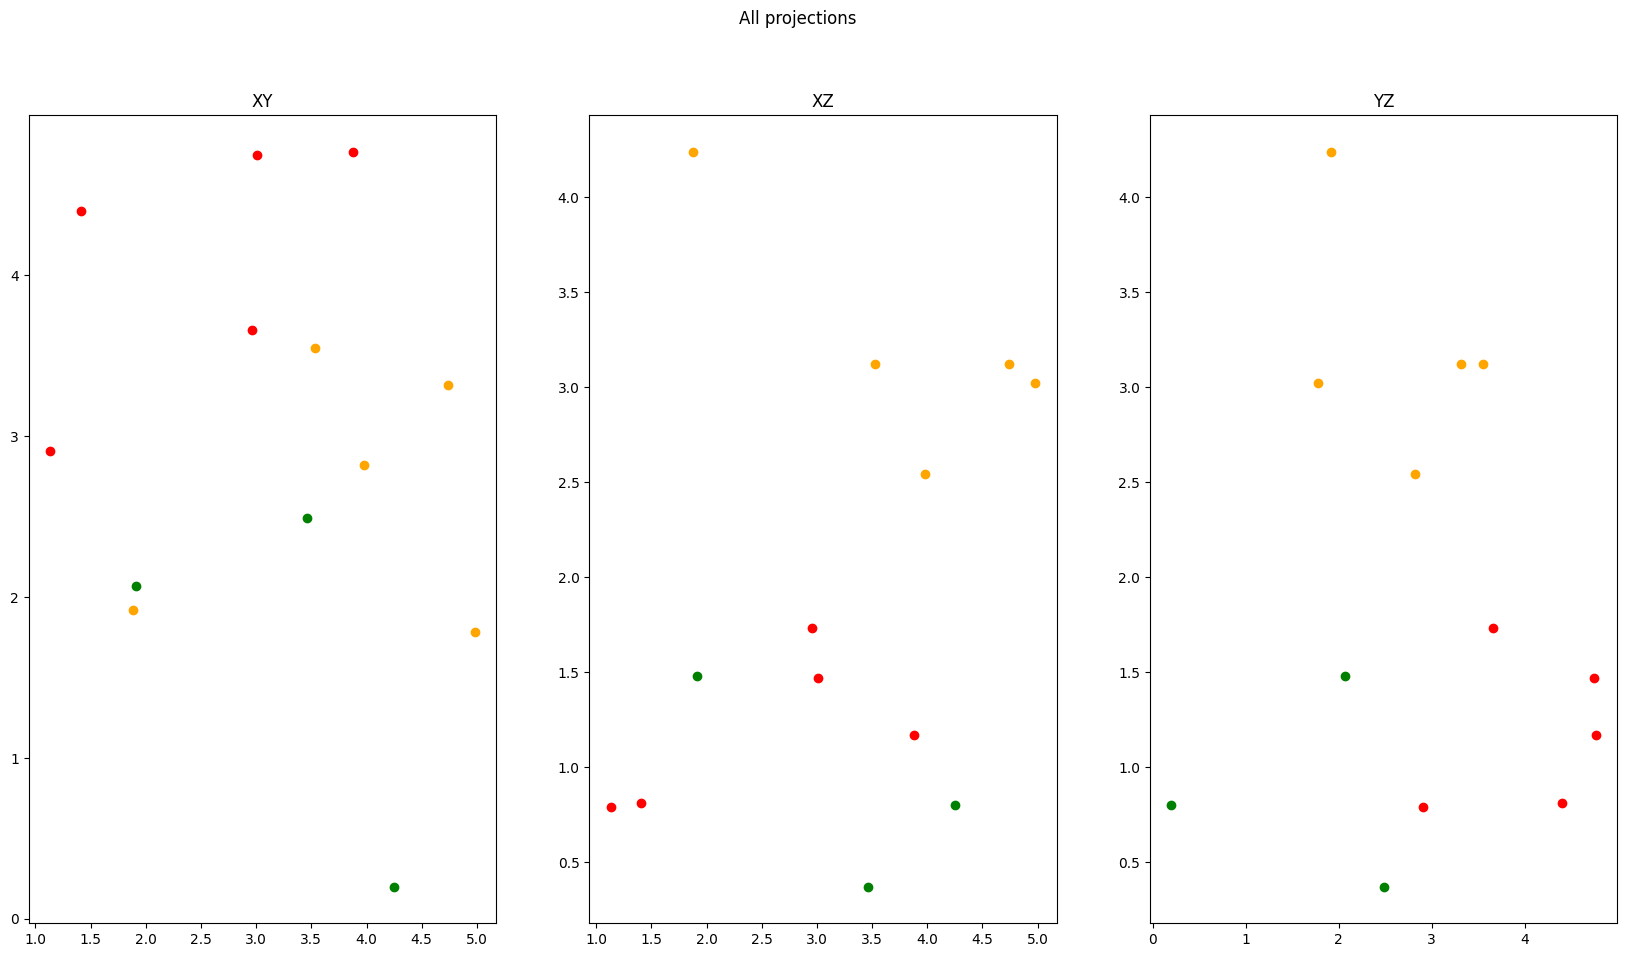

In [62]:
# create 3 subplots
fig, ax = plt.subplots(nrows=1, ncols=3)

# XY
ax[0].scatter(X_red[:, 0], X_red[:, 1], c='red', marker='o') 
ax[0].scatter(X_orange[:, 0], X_orange[:, 1], c='orange', marker='o') 
ax[0].scatter(X_green[:, 0], X_green[:, 1], c='green', marker='o') 

# XZ
ax[1].scatter(X_red[:, 0], X_red[:, 2], c='red', marker='o') 
ax[1].scatter(X_orange[:, 0], X_orange[:, 2], c='orange', marker='o') 
ax[1].scatter(X_green[:, 0], X_green[:, 2], c='green', marker='o') 

# YZ
ax[2].scatter(X_red[:, 1], X_red[:, 2], c='red', marker='o') 
ax[2].scatter(X_orange[:, 1], X_orange[:, 2], c='orange', marker='o') 
ax[2].scatter(X_green[:, 1], X_green[:, 2], c='green', marker='o') 

# plot 3 subplots
ax[0].set_title('XY')
ax[1].set_title('XZ')
ax[2].set_title('YZ')
 
fig.set_size_inches(20.5, 10.5)

fig.suptitle('All projections')
plt.show()

### Поиск наиболее оптимального количества кластеров с помощью индекса Дэвида-Болдуина

In [63]:
results = {}

for i in range(2,13):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    results.update({i: db_index})

c:\Users\AlexS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AlexS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AlexS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AlexS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

### Отображение графика изменения индекса Дэвида-Болдуина для исходных данных в зависимости от количества кластеров

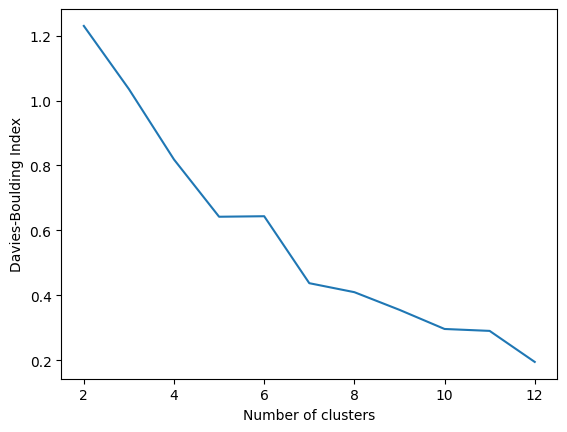

In [64]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()